## 1. 딥러닝 프레임워크 
딥러닝 프레임워크는 왜 필요할까요?

딥러닝을 하기 위해선 이런 것들이 필요합니다. 
- 역전파 기능
- 모델을 gpu에서 돌릴 수 있도록 하는 기능 
- 데이터를 gpu에 올리는 기능
- 모델 구조를 구현
- 역전파할 때의 optimizer
- learning rate 조정을 할 수 있는 scheduler
- 기타 등등...

이것들을 매번 구현하기에는 시간도 오래걸리고 매번 효율화를 할 수 없습니다.<br>
그래서 우리는 딥러닝 프레임워크를 사용하면 미리 정의된 클래스, 메소드를 사용하여 **비교적 간단하게(!)**구현할 수 있습니다<br>
대표적인 프레임워크로는 tensorflow와 pyTorch가 있습니다

## 2. tensorflow vs. torch

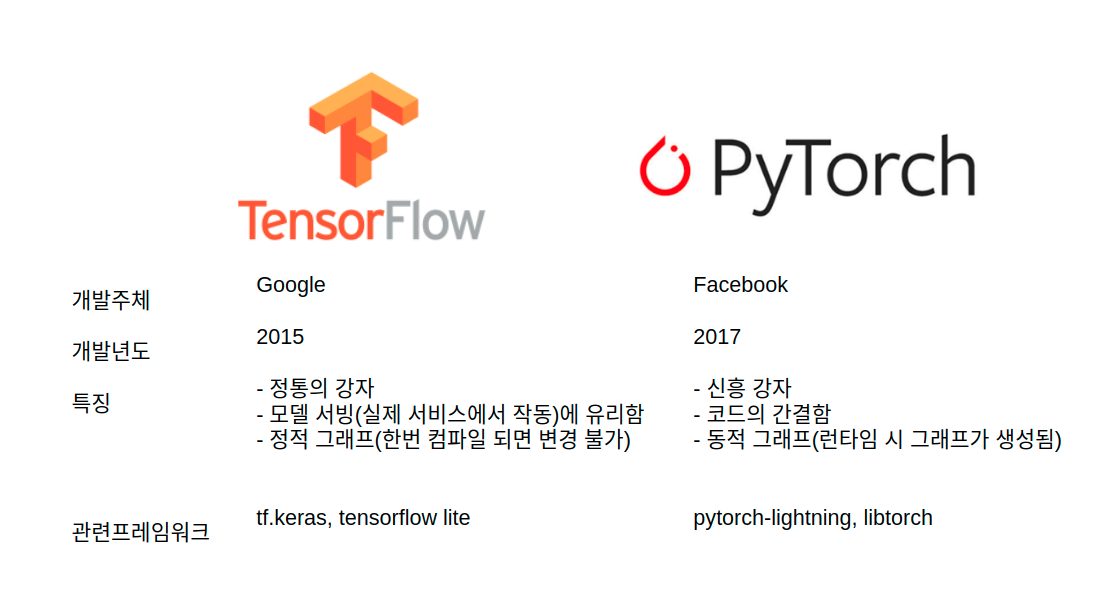

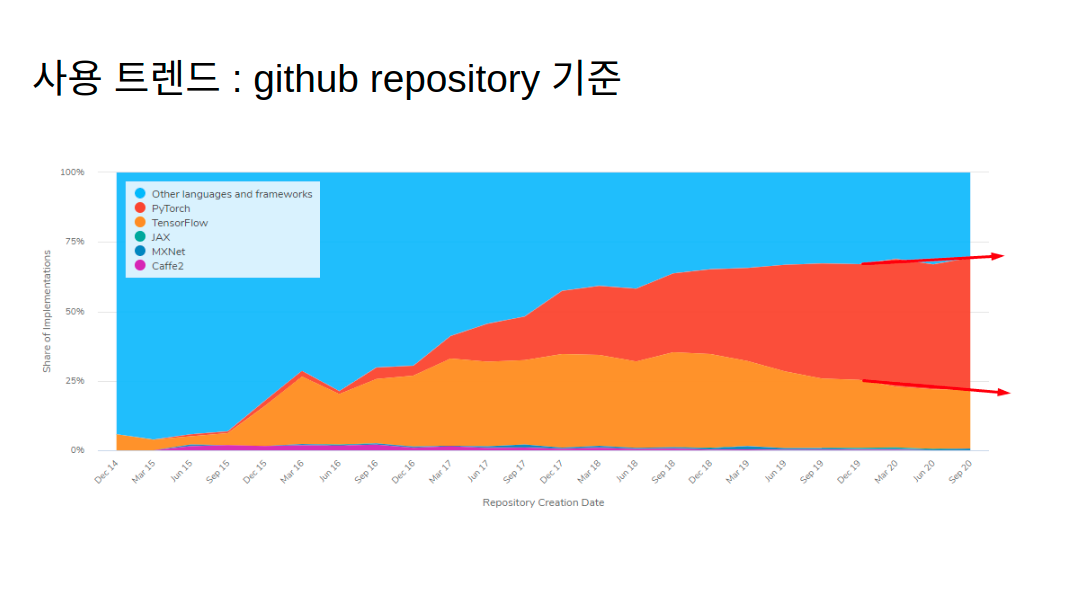

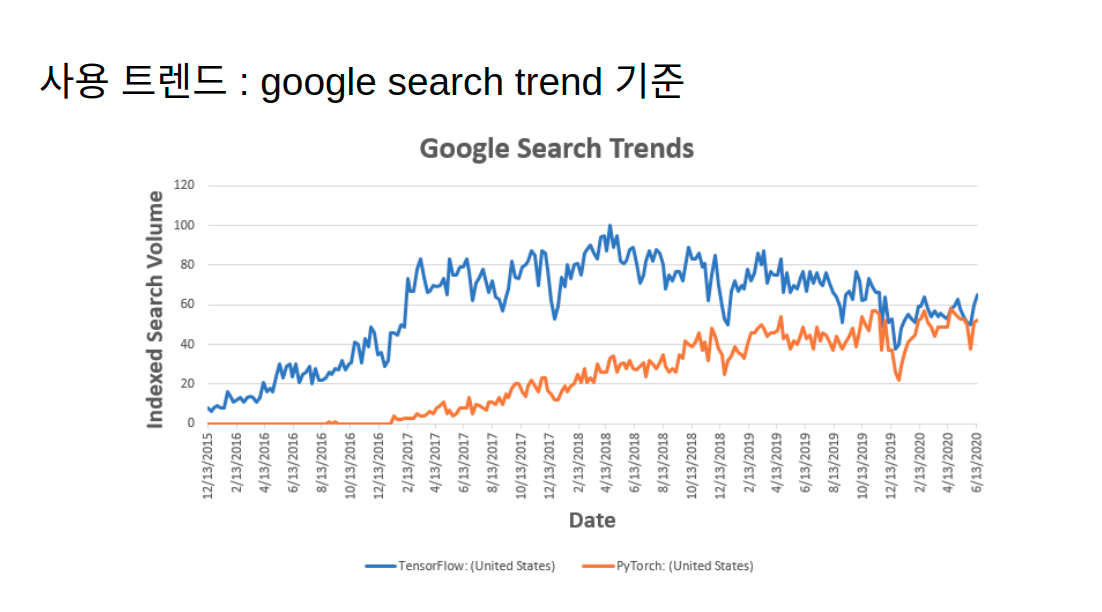

## 3. torch 기본 텐서조작 

torch의 자료형으로는 tensor가 있습니다. tensor는 기본적으로 numpy.array와 유사하며 메소드도 공유하고 있습니다.<br>
numpy.array를 잠깐 복습해봅시다.

In [1]:
import torch
import numpy as np

In [2]:
X = np.array([[0, 1, 0], [0, 0, 0]])
print(X) 
print(X.shape)

[[0 1 0]
 [0 0 0]]
(2, 3)


In [3]:
X = np.zeros((2, 5))
print(X)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### 문제 1: 2 by 3 np.array를 1 by 6으로 만들어보세요
**hint : reshape**

In [4]:
# X.reshape((-1, 6))

이 때 shape이 (1, 6)과 (6,)은 다름을 알아둡시다! 

In [5]:
np.ones(6), np.ones((1, 6))

(array([1., 1., 1., 1., 1., 1.]), array([[1., 1., 1., 1., 1., 1.]]))

torch의 tensor는 이와 매우 유사합니다. 이 때, torch.Tensor와 torch.tensor는 사용법이 다름을 유의합시다

In [6]:
X = torch.Tensor(3, 5) # 3 by 5 random tensor생성, np.random.rand와 같은 기능
X

tensor([[2.6409e-06, 1.0682e-05, 1.2470e+16, 1.2849e+31, 1.8395e+25],
        [6.1963e-04, 5.4645e-05, 3.3064e-09, 8.5747e-07, 3.3241e+21],
        [6.6815e+22, 1.6630e+22, 1.0256e-08, 1.0979e-05, 2.3048e-12]])

In [7]:
X = torch.tensor([3, 6]) # torch.tensor는 리스트나 어레이를 받아 텐서로 만들어줍니다
X

tensor([3, 6])

numpy.array를 torch의 tensor로, 또 torch의 tensor를 numpy.array로 옮길 수 있습니다

In [8]:
np_x = np.ones((3, 5))
print(np_x)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [9]:
torch_x = torch.from_numpy(np_x)
print(torch_x)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=torch.float64)


tensor에도 다양한 메소드가 있습니다. 그 중 가장 많이 쓰이는 것 위주로 배워봅시다.<br> 외의 메소드에 대해서는 공식 문서를 참고합시다.
https://pytorch.org/docs/stable/tensors.html

### squeeze / unsqueeze
squeeze와 unsqueeze는 차원을 줄이거나 늘릴 때 사용하는 메소드입니다

In [10]:
print(torch_x.shape)
torch_x = torch_x.unsqueeze(0)
print(torch_x.shape)         # unsqueeze는 입력으로 받은 차원을 하나 더 생성해줍니다
torch_x = torch_x.squeeze(0) # squeeze는 입력으로 받은 차원의 크기 1이라면 차원을 제거해줍니다
print(torch_x.shape) 
torch_x = torch_x.squeeze(1) # 차원의 크기가 1이 아니라면 제거할 수 없습니다
print(torch_x.shape) 

torch.Size([3, 5])
torch.Size([1, 3, 5])
torch.Size([3, 5])
torch.Size([3, 5])


### transpose / permute
transpose와 permute는 차원의 위치를 변경하는데 사용됩니다

In [11]:
torch_x = torch_x.permute(1, 0) # 1번째 차원을 0번째 차원으로, 0번째 차원을 1번째 차원으로
print(torch_x.shape)
      
torch_x = torch_x.transpose(1, 0) # 1번째 차원을 0번째 차원으로, 0번빼 차원을 1번째 차원으로
print(torch_x.shape)

torch.Size([5, 3])
torch.Size([3, 5])


### view
np.array의 reshape과 비슷합니다. 그러나 작동방식이 쭉 한줄로 펼친 후 shape에 맞게 자르는 것임에 주의합니다. <br>
그래서 view의 사용은 최대한 자제하는 것이 좋습니다.

In [12]:
x = torch.arange(1, 13)
print(x)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


In [13]:
x_2_6 = x.view(2, 6)
x_2_6

tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]])

In [14]:
x_2_6.view(6, 2)

tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12]])

view에서 어떤 차원의 size를 -1로 주면 나머지가 정해졌을 때 자동으로 정해지는 값으로 구해지게 됩니다.

In [15]:
x_2_6.view(-1, 4)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

### 문제 2 : x_2_6을  위와 같이 만드려면 어떻게 해야할까요?
tensor([[ 1,  7],<br>
        [ 2,  8],<br>
        [ 3,  9],<br>
        [ 4, 10],<br>
        [ 5, 11],<br>
        [ 6, 12]])<br>
**hint :** 방금 배움

In [16]:
# x_2_6.transpose(1, 0)

## broadcasting 
마지막으로 텐서는 지난번에 배운 `np.array`와 마찬가지로 브로드캐스팅 처리가 됩니다.<br>
브로드캐스팅이란 shape이 맞지 않아도 자동으로 shape에 맞추어 연산을 하는 것을 의미합니다

In [17]:
x = torch.zeros(3, 5) 
x + 1

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [18]:
d_1_5 = torch.range(1, 5)
x.shape, d_1_5.shape

/home/long8v/anaconda3/envs/long36v/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """Entry point for launching an IPython kernel.


(torch.Size([3, 5]), torch.Size([5]))

In [19]:
x + d_1_5

tensor([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]])

## 4. Neural Network 
이제 뉴럴 네트워크를 만들어봅시다<br>
Fully Connected Network를 사용하여 가상의 데이터 분포를 근사하는 모델을 만들어봅시다 

In [20]:
from torch import nn
from torch.nn import MSELoss
import torch
import matplotlib.pyplot as plt

## 네트워크 쌓기
torch는 `nn.Module`이라는 클래스를 상속하여 간단하게 모델을 만들 수 있습니다.<br>
오늘은 첫 시간이니, FCN를 쌓을 수 있는 `nn.Linear`와 활성화 함수인 `nn.ReLU`를 활용하여 아주 간단한 네트워크를 쌓을 겁니다.<br>
네트워크를 쌓을 때는 항상 input의 차원을 잘 확인하여 정의하는 것이 가장 중요합니다.

## `nn.Linear`
`nn.Linear`는 FCN을 간단하게 짤 수 있습니다.<br>
처음에 정의할 때는 **torch.nn.Linear(입력값의 차원, 출력값의 차원)** 를 받습니다.


In [21]:
# 컬럼이 5개인 데이터가 10개 있는 상황입니다
X = torch.Tensor(10, 5) 

In [22]:
# 컬럼 5개에 weight를 곱한 뒤 3개의 output_dim으로 내보내는 층입니다
linear = nn.Linear(5, 3) 

In [23]:
# Y = WX 로 결과값은 아래와 같이 되게 됩니다
Y = linear(X)
print(Y, Y.shape)

tensor([[-1.7546e+00, -9.2723e-01, -5.0824e-01],
        [-1.1954e+00, -1.0645e+00, -1.2120e+00],
        [-1.1954e+00, -1.0645e+00, -1.2120e+00],
        [-1.4599e+00, -8.3876e-01, -5.6155e-01],
        [ 3.2736e+08,  1.1053e+08,  2.3118e+08],
        [-1.4394e+00, -4.6734e-01, -8.0310e-01],
        [-3.8748e-01,  1.4888e-01, -1.2244e-01],
        [-3.8748e-01,  1.4888e-01, -1.2244e-01],
        [-3.8748e-01,  1.4888e-01, -1.2244e-01],
        [-3.8748e-01,  1.4888e-01, -1.2244e-01]], grad_fn=<AddmmBackward>) torch.Size([10, 3])


# `nn.ReLU`
뉴럴 네트워크가 학습이 가능한 것은 단순 선형결합이 아닌 활성화함수(activation function)이라고 하는 비선형 함수를 사용하기 때문입니다.<br> 
ReLU의 수식은 아주 간단합니다. $$ReLU(x) = max(0, x)$$<br>
바로 0 이상은 그대로 출력하고 0 이하는 0으로 바꿔버리는 활성화 함수입니다. 그래프는 아래와 같이 생겼습니다.<br>

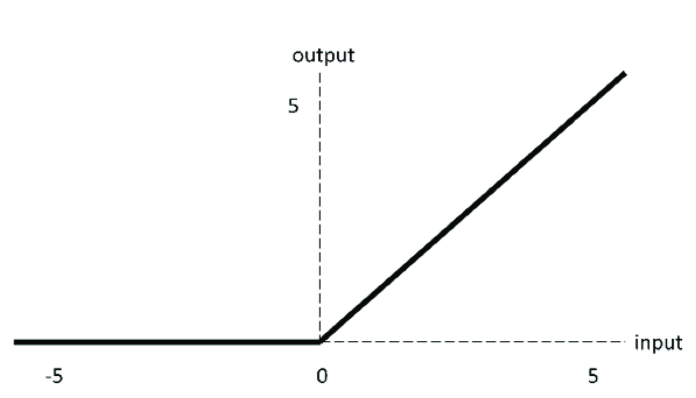

In [24]:
# 컬럼이 5개인 데이터가 10개 있는 상황입니다
X = torch.rand(10, 5) 
print(X) # 모두 양수입니다

tensor([[0.9948, 0.8186, 0.7871, 0.0553, 0.1793],
        [0.1653, 0.7584, 0.5369, 0.7807, 0.6478],
        [0.5883, 0.2540, 0.7716, 0.7703, 0.5112],
        [0.3686, 0.4112, 0.4907, 0.1441, 0.0310],
        [0.4560, 0.8381, 0.8941, 0.7504, 0.9567],
        [0.1444, 0.1740, 0.9405, 0.9402, 0.1463],
        [0.9526, 0.9529, 0.1714, 0.7925, 0.8676],
        [0.8363, 0.4069, 0.4115, 0.7209, 0.3979],
        [0.5774, 0.5907, 0.7948, 0.5444, 0.6750],
        [0.4311, 0.5462, 0.2698, 0.6261, 0.2084]])


In [25]:
# ReLU의 효과를 보기위해서 [-1 ~ 1] 사이의 uniform distribution으로 바꿔줍시다.
# torch에서 메소드 뒤에 _가 붙으면 그 자체를 바꿔주어서 
# X = X.uniform_(.,,) 과 같이 적지 않아도 됩니다
X.uniform_(-1, 1)
print(X) # 이제는 음수와 양수가 있는 것을 볼 수 있습니다 

tensor([[-0.2134, -0.8653, -0.0018, -0.4193, -0.9458],
        [-0.3681, -0.5487, -0.6007, -0.5929,  0.8244],
        [ 0.6055, -0.5624, -0.7227,  0.7779, -0.2392],
        [ 0.2876,  0.3102,  0.4507, -0.1987,  0.5870],
        [-0.9889,  0.9107,  0.0557,  0.4574,  0.2027],
        [-0.5795,  0.2513, -0.5127,  0.5197,  0.0627],
        [ 0.1866,  0.4065, -0.4954,  0.1374, -0.1167],
        [-0.9276,  0.9319,  0.0863,  0.5621, -0.1170],
        [ 0.0806, -0.5363,  0.3731, -0.7302, -0.6977],
        [ 0.3068, -0.1469, -0.6353, -0.1302,  0.5094]])


In [26]:
relu = nn.ReLU()

In [27]:
relu(X) # ReLU 함수를 거치니 음수는 다 0으로 바뀐 것을 알 수 있습니다

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8244],
        [0.6055, 0.0000, 0.0000, 0.7779, 0.0000],
        [0.2876, 0.3102, 0.4507, 0.0000, 0.5870],
        [0.0000, 0.9107, 0.0557, 0.4574, 0.2027],
        [0.0000, 0.2513, 0.0000, 0.5197, 0.0627],
        [0.1866, 0.4065, 0.0000, 0.1374, 0.0000],
        [0.0000, 0.9319, 0.0863, 0.5621, 0.0000],
        [0.0806, 0.0000, 0.3731, 0.0000, 0.0000],
        [0.3068, 0.0000, 0.0000, 0.0000, 0.5094]])

# 실전! 네트워크 쌓기
이제 정말 네트워크를 쌓을 시간입니다.<br>
파이토치에서 네트워크를 쌓을 때는 아래와 같은 문법으로 적게 됩니다.

In [28]:
class fcn(nn.Module): 
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        '''
        여기에 두번째 linear 함수를 정의주세요!
        self.fc2 = ...
        '''
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, src):
        output = self.fc1(src) # [batch size, hidden_size]
        output = self.relu(output)
        '''
        여기에 두번째 linear 함수를 쌓아주세요!
        '''
        output = self.fc2(output)
        return output

## 모델 정의
이제 모델을 정의해봅시다.<br>
우리의 input의 차원은 1입니다. f(x) = x^2에서 x는 3이 들어가면 f(3) = 9, f(2) = 4와 같이 함수에 변수가 하나씩 들어가기 때문입니다.<br>
그리고 hidden_dim은 인공신경망에서 중간 레이어에 유닛이 몇개가 될지를 선택하는 하이퍼파라미터입니다. 크면 클수록 모델의 파라미터가 커지게 됩니다.

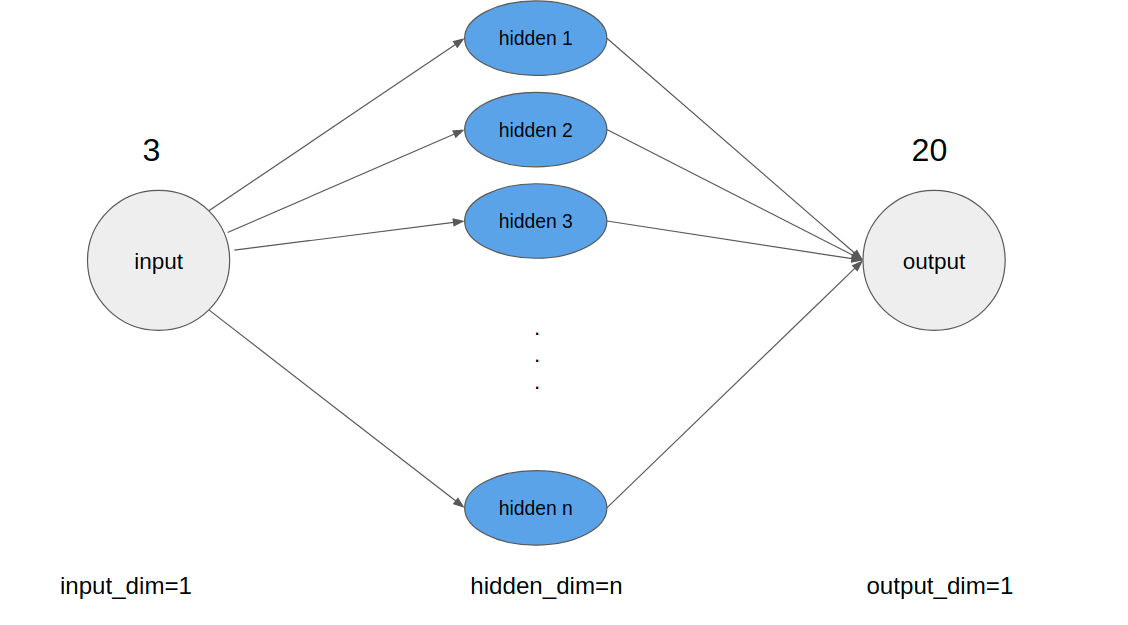

In [29]:
input_dim = 1
hidden_dim = 200
output_dim = 1

In [30]:
model = fcn(input_dim, hidden_dim, output_dim)

# 데이터셋 생성
오늘 실습에서 가상의 랜덤데이터를 가지고 모델을 학습하게 됩니다.<br>
[-20, 20]의 uniform distribution에서 10만개의 sample 데이터를 만들어 변수 `X`에 할당하는 코드를 짜봅시다.

In [31]:
N_data = 100000
X = torch.rand(N_data).uniform_(-20, 20)

이제 근사할 `Y`변수를 생성해봅시다. 첫 실습은 X와 Y가 이차함수 관계였으면 좋겠습니다.<Br>
(**hint**: broacasting)

In [32]:
Y = X ** 2

## batch 학습
모델을 학습을 할 때에 전체 데이터셋을 보고 loss를 구할 수 도 있지만 데이터가 너무 커지면 업데이트를 자주 못하기 때문에 학습이 느려지는 단점이 있습니다.<br>
이런 문제를 해결하기 위해서 딥러닝에서 배치라고 하는 작은 단위로 나눈뒤 역전파를 진행하게 됩니다. 몇 개의 데이터를 한번에 볼지를 배치사이즈(batch size)라고 합니다. 배치 사이즈가 작아지면 자주 업데이트를 하지만 변동성이 커져서 안정적이지 못할 수 있고, 배치 사이즈가 커지면 변동성이 적지만 업데이트를 자주 못하고 평균적인 loss를 구해서 디테일한 부분을 놓칠 수 있습니다.<br>

In [33]:
batch_size = 1000

데이터셋을 (데이터 개수, 배치사이즈, 인풋의 차원)으로 만들어 줍시다. .view를 사용할 수 있습니다.<Br>

In [34]:
X = X.view(-1, batch_size, 1) # 인풋의 차원이 1인 1000개의 묶음이 100개 있습니다. 
Y = Y.view(-1, batch_size, 1)
print(X.shape, Y.shape)

torch.Size([100, 1000, 1]) torch.Size([100, 1000, 1])


## criterion, optimizer 정의 
### criterion : Mean Squared Error(MSE)
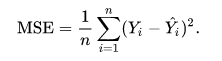<br>
실제값과 예측값의 차이의 제곱의 합을 mean-squared-error라고 합니다.<br>
가령 f(3) = 20 이 나오면 실제값은 9 이기 때문에 (20-9)^2 = 121<br>
f(1) = 9가 나오면 실제값은 1이기 때문에 (9-1)^2 = 64<br>
MSE는 이때 (121 + 64) / 2 = 92.5가 되게 됩니다.<br>
torch에서는 `nn.MSELoss`라고 정의를 한 뒤에 (예측값, 실제값)을 넣으면 loss를 구하게 됩니다.<br>
그리고 `loss.backward()`라는 함수를 통해 loss를 weight로 미분하여 gradient를 구해 역전파를 진행하게 됩니다.

In [35]:
criterion = nn.MSELoss()

In [36]:
loss = criterion(torch.tensor([20.0, 9.0]), torch.tensor([9.0, 1.0]))
print(loss.data)

tensor(92.5000)


### Adam 
optimizer는 역전파를 진행할 때 안정적으로 학습이 될 수 있도록 해줍니다.<br>
이번 실습에는 Adam이라는 optimizer를 사용합니다.

In [37]:
optimizer = torch.optim.Adam(model.parameters())

In [38]:
# device = 'cuda'
# model.to(device);

weight를 초기화 해줍니다. 오늘은 uniform distribution으로 초기화합니다.

In [39]:
def initialize_weights(m):
    for name, param in m.named_parameters():
        torch.nn.init.uniform(param.data)

In [40]:
model.apply(initialize_weights);

/home/long8v/anaconda3/envs/long36v/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


## 모델 학습
모델을 학습합니다<br>
데이터 한 바퀴를 보는 것을 에폭이라고 하고, 10에폭이라고 하면 모델이 전체 데이터를 10번 봤다는 뜻입니다.<br>
중간 중간 -20 부터 20

In [41]:
device ='cpu'

In [42]:
n_epochs = 1000  # 에폭 수 :데이터 한바퀴를 몇번을 볼 지 
n_print = 100    # 몇 에폭에 

/home/long8v/anaconda3/envs/long36v/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  del sys.path[0]


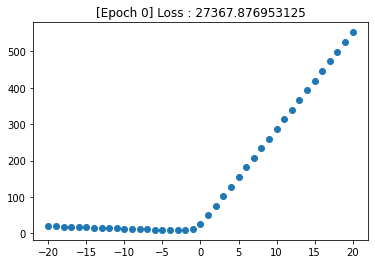

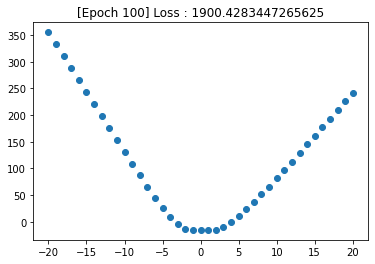

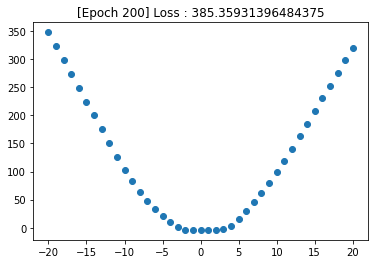

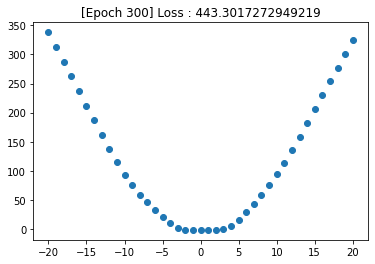

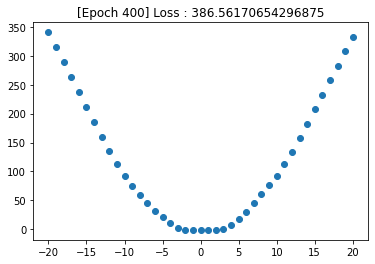

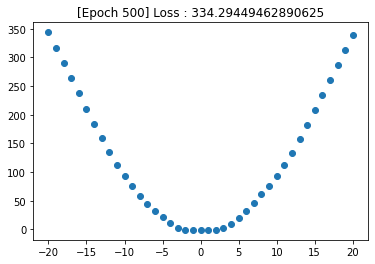

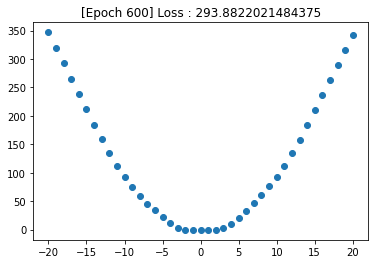

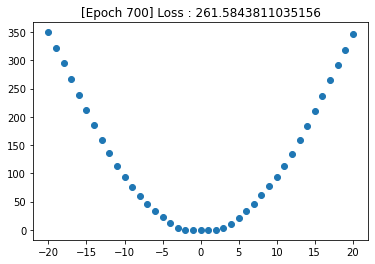

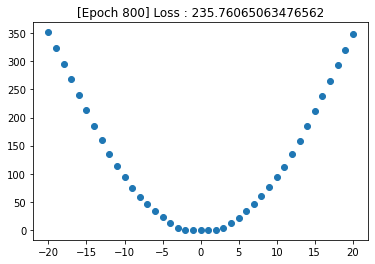

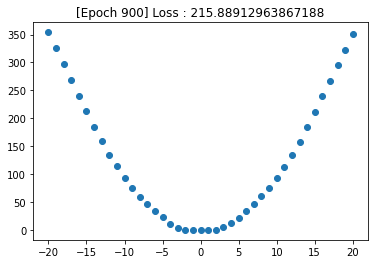

In [43]:
output_list = []
for epoch in range(n_epochs):
    optimizer.zero_grad() # 모델 학습 전 gradient
    for idx in range(X.shape[0]): 
        x = X[idx, :, :]
        y = Y[idx, : , :]
        loss = criterion(model(x), y)
        loss.backward()
        optimizer.step()
    if epoch % n_print == 0:
        model.eval()
        with torch.no_grad():
            xx = torch.range(-20, 20, 1)
            yy = model(xx.unsqueeze(1).to(device))
            plt.scatter(xx, yy.data.cpu())
            plt.title(f'[Epoch {epoch}] Loss : {loss.data}')
            plt.show()

## 실습해봅시다 & 생각해봅시다
- `reLU`말고 다른 활성화 함수를 사용해봅시다. 초기 그래프는 어떤 모양으로 그려지나요? 왜 그럴까요?
- 활성화 함수를 빼고 FC1 + FC2 두개로만 학습을 해봅시다. 학습이 잘 되나요? 안된다면 그 이유는 무엇일까요? 자유롭게 생각해봅시다